In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import tensorflow as tf
import keras

In [63]:
dataset = pd.read_csv('C:/Users/Pavel/Lessen_jypyter/Credit_card.csv')

In [64]:
dataset_label = pd.read_csv('C:/Users/Pavel/Lessen_jypyter/Credit_card_label.csv')

In [65]:
dataset

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [66]:
dataset_label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [69]:
dataset.describe

<bound method NDFrame.describe of        Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner  

In [89]:
dataset.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
dtype: object

In [70]:
dataset.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [71]:
dataset = dataset.fillna(0)

In [72]:
dataset.isna().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

In [84]:
dataset['GENDER'] = dataset['GENDER'].map({'M': 1, 'F': 2, 0: 0}).astype(int)
dataset["GENDER"].value_counts()

GENDER
2    973
1    568
0      7
Name: count, dtype: int64

In [75]:
dataset['Car_Owner'] = dataset['Car_Owner'].map({'Y': 1, 'N': 0}).astype(int)

In [86]:
dataset['Car_Owner'].value_counts()

Car_Owner
0    924
1    624
Name: count, dtype: int64

In [89]:
dataset['Propert_Owner'] = dataset['Propert_Owner'].map({'Y': 1, 'N': 0}).astype(int)
dataset['Propert_Owner'].value_counts()

Propert_Owner
1    1010
0     538
Name: count, dtype: int64

In [92]:
dataset['Type_Income'].value_counts()

Type_Income
3    798
2    365
1    269
4    116
Name: count, dtype: int64

In [91]:
dataset['Type_Income'] = dataset['Type_Income'].map({'Pensioner': 1,
                                                     'Commercial associate': 2,
                                                     'Working': 3,
                                                     'State servant': 4
                                                    }).astype(int)

In [94]:
dataset['EDUCATION'].value_counts()

EDUCATION
1    1031
2     426
3      68
4      21
5       2
Name: count, dtype: int64

In [93]:
dataset['EDUCATION'] = dataset['EDUCATION'].map({'Secondary / secondary special': 1,
                                                 'Higher education': 2,
                                                 'Incomplete higher': 3,
                                                 'Lower secondary': 4,
                                                 'Academic degree': 5
                                                }).astype(int)

In [96]:
dataset.dtypes

Ind_ID               int64
GENDER               int64
Car_Owner            int64
Propert_Owner        int64
CHILDREN             int64
Annual_income      float64
Type_Income          int64
EDUCATION            int64
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
dtype: object

In [114]:
dataset['Marital_status'] = dataset['Marital_status'].map({'Married': 1,
                                                               'Single / not married': 2,
                                                               'Civil marriage': 3,
                                                               'Separated': 4,
                                                               'Widow': 5
                                                              }).astype(int)

In [115]:
dataset['Marital_status'].value_counts()

Marital_status
1    1049
2     227
3     101
4      96
5      75
Name: count, dtype: int64

In [99]:
dataset['Housing_type'] = dataset['Housing_type'].map({'House / apartment': 1,
                                                       'With parents': 2,
                                                       'Municipal apartment': 3,
                                                       'Rented apartment': 4,
                                                       'Office apartment': 5,
                                                       'Co-op apartment': 6
                                                      }).astype(int)

In [100]:
dataset['Housing_type'].value_counts()

Housing_type
1    1380
2      80
3      53
4      21
5       9
6       5
Name: count, dtype: int64

In [102]:
dataset['Type_Occupation'].value_counts()

Type_Occupation
0                        488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: count, dtype: int64

In [104]:
dataset = dataset.drop(columns=["Type_Occupation"])

In [105]:
dataset

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,2,Married,1,-18772.0,365243,1,0,0,0,2,1
1,5009744,2,1,0,0,315000.0,2,2,Married,1,-13557.0,-586,1,1,1,0,2,1
2,5009746,2,1,0,0,315000.0,2,2,Married,1,0.0,-586,1,1,1,0,2,1
3,5009749,2,1,0,0,0.0,2,2,Married,1,-13557.0,-586,1,1,1,0,2,1
4,5009752,2,1,0,0,315000.0,2,2,Married,1,-13557.0,-586,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,2,0,1,0,0.0,2,2,Married,1,-11957.0,-2182,1,0,0,0,2,0
1544,5023655,2,0,0,0,225000.0,2,3,Single / not married,1,-10229.0,-1209,1,0,0,0,1,0
1545,5115992,1,1,1,2,180000.0,3,2,Married,1,-13174.0,-2477,1,0,0,0,4,0
1546,5118219,1,1,0,0,270000.0,3,1,Civil marriage,1,-15292.0,-645,1,1,1,0,2,0


In [108]:
dataset = pd.merge(dataset, dataset_label, on='Ind_ID', how='inner')

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label_x,label_y,label
0,5008827,1,1,1,0,180000.0,1,2,Married,1,-18772.0,365243,1,0,0,0,2,1,1,1
1,5009744,2,1,0,0,315000.0,2,2,Married,1,-13557.0,-586,1,1,1,0,2,1,1,1
2,5009746,2,1,0,0,315000.0,2,2,Married,1,0.0,-586,1,1,1,0,2,1,1,1
3,5009749,2,1,0,0,0.0,2,2,Married,1,-13557.0,-586,1,1,1,0,2,1,1,1
4,5009752,2,1,0,0,315000.0,2,2,Married,1,-13557.0,-586,1,1,1,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,2,0,1,0,0.0,2,2,Married,1,-11957.0,-2182,1,0,0,0,2,0,0,0
1544,5023655,2,0,0,0,225000.0,2,3,Single / not married,1,-10229.0,-1209,1,0,0,0,1,0,0,0
1545,5115992,1,1,1,2,180000.0,3,2,Married,1,-13174.0,-2477,1,0,0,0,4,0,0,0
1546,5118219,1,1,0,0,270000.0,3,1,Civil marriage,1,-15292.0,-645,1,1,1,0,2,0,0,0


In [111]:
dataset

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,2,Married,1,-18772.0,365243,1,0,0,0,2,1
1,5009744,2,1,0,0,315000.0,2,2,Married,1,-13557.0,-586,1,1,1,0,2,1
2,5009746,2,1,0,0,315000.0,2,2,Married,1,0.0,-586,1,1,1,0,2,1
3,5009749,2,1,0,0,0.0,2,2,Married,1,-13557.0,-586,1,1,1,0,2,1
4,5009752,2,1,0,0,315000.0,2,2,Married,1,-13557.0,-586,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,2,0,1,0,0.0,2,2,Married,1,-11957.0,-2182,1,0,0,0,2,0
1544,5023655,2,0,0,0,225000.0,2,3,Single / not married,1,-10229.0,-1209,1,0,0,0,1,0
1545,5115992,1,1,1,2,180000.0,3,2,Married,1,-13174.0,-2477,1,0,0,0,4,0
1546,5118219,1,1,0,0,270000.0,3,1,Civil marriage,1,-15292.0,-645,1,1,1,0,2,0


In [116]:
dataset.dtypes

Ind_ID              int64
GENDER              int64
Car_Owner           int64
Propert_Owner       int64
CHILDREN            int64
Annual_income     float64
Type_Income         int64
EDUCATION           int64
Marital_status      int64
Housing_type        int64
Birthday_count    float64
Employed_days       int64
Mobile_phone        int64
Work_Phone          int64
Phone               int64
EMAIL_ID            int64
Family_Members      int64
label               int64
dtype: object

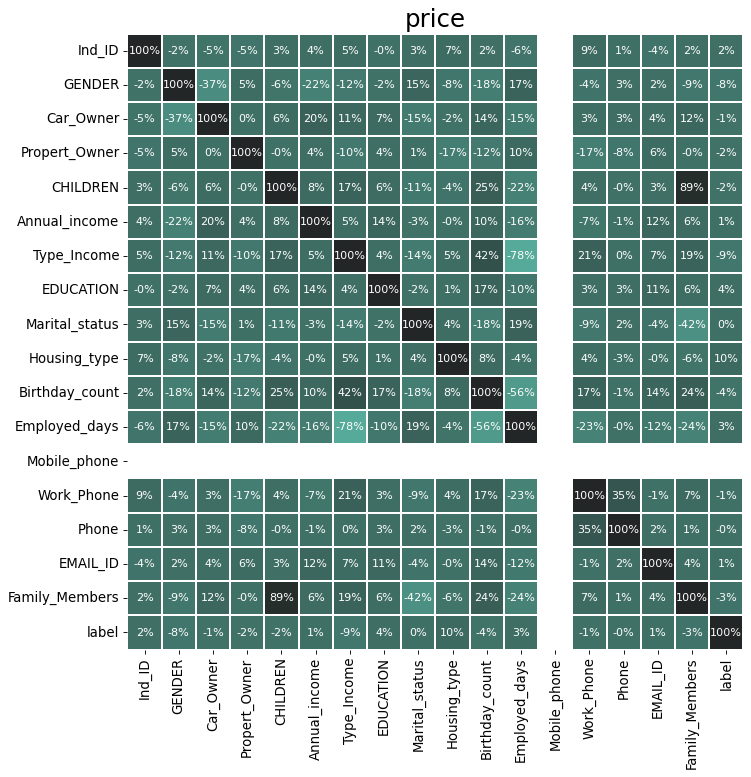

In [117]:

plt.figure(figsize=(16,10), dpi= 80)
sns.heatmap(dataset.corr(),
            xticklabels=dataset.corr().columns,
            yticklabels=dataset.corr().columns,
            annot = True,
            fmt = '.0%',
            square = True,
            linewidth = 0.1,
            cmap = sns.color_palette("dark:#5A9_r", as_cmap=True),
            cbar = False
           )

plt.title('price', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [122]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [136]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [123]:
X = dataset.drop(columns=["label"])
y = dataset['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [247]:
Tree = tree.DecisionTreeClassifier(max_depth=4,min_samples_leaf= 1, min_samples_split= 6)
Tree.fit(x_train, y_train)
Tree_predict = Tree.predict(X_test)

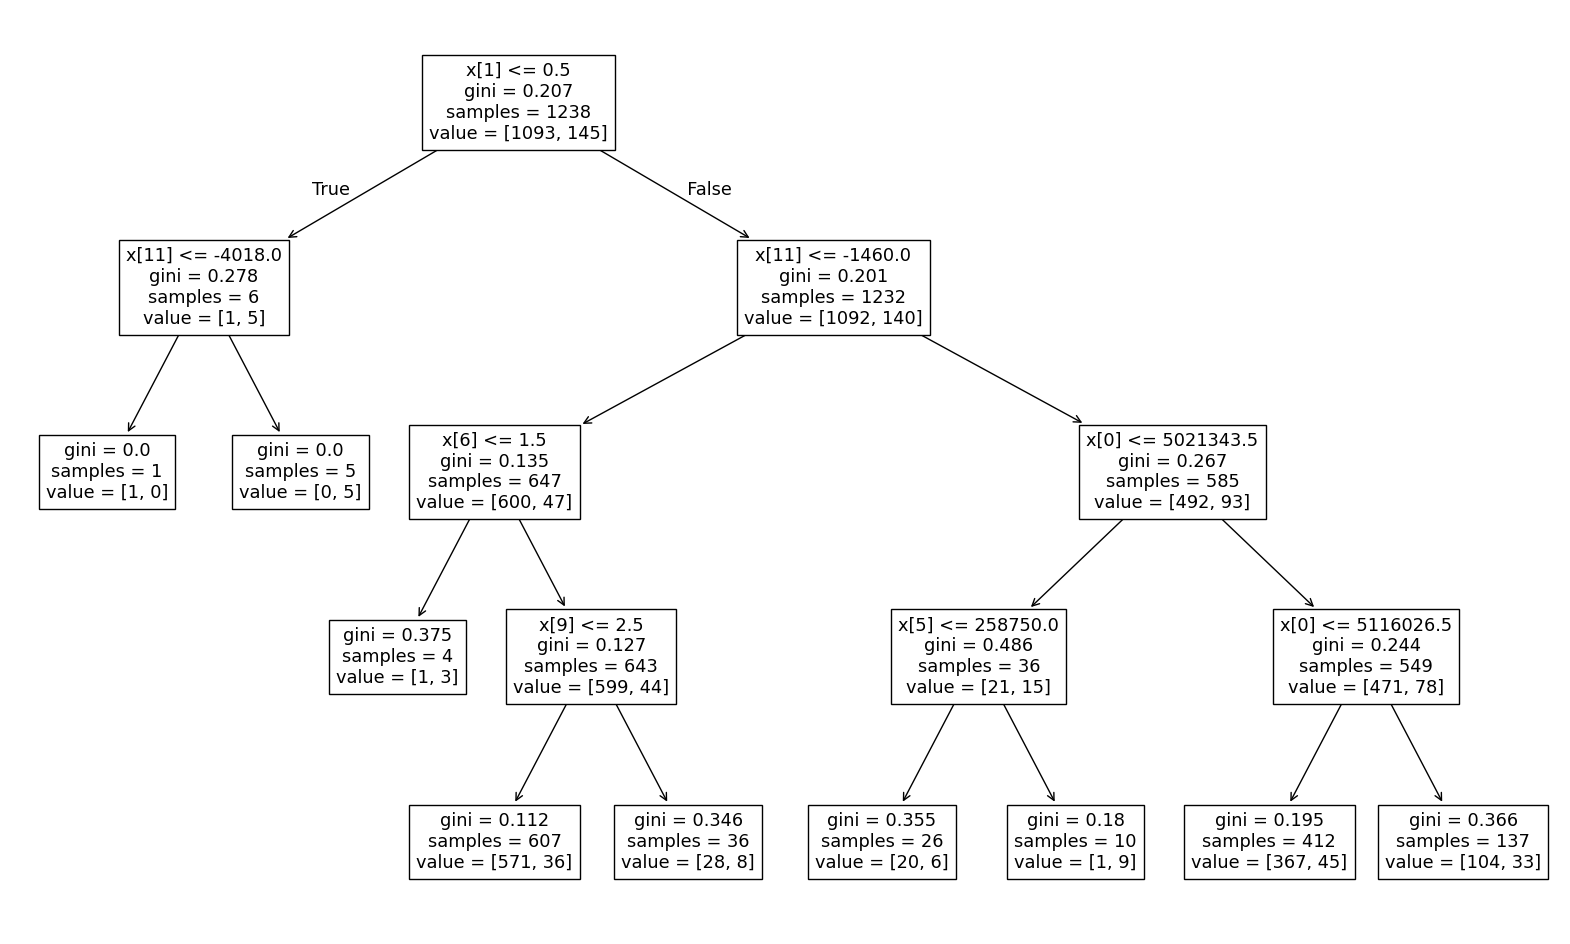

In [248]:
plt.figure(figsize=(20,12))
tree.plot_tree(Tree) 
plt.show()

In [249]:
Tree_accuracy = accuracy_score(y_test, Tree_predict)
Tree_f1 = f1_score(y_test, Tree_predict, average = None)
print('\nAccuracy Tree: ', Tree_accuracy)
print('F1 Tree', Tree_f1)


Accuracy Tree:  0.9
F1 Tree [0.9471891  0.06060606]


In [246]:
print('\n',Tree.score(X_train, y_train))
print('',Tree.score(X_test, y_test))


 0.8933764135702746
 0.9


In [200]:
import tensorflow as tf
from tensorflow import keras

In [202]:
from keras import Input
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [211]:
model = keras.Sequential([
    Input(shape=(17,)),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(1)
])

In [212]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.BinaryFocalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [215]:
model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8023 - loss: 2428.4739
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7972 - loss: 3022.0891 
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7965 - loss: 3195.4121 
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 5367.1675
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7817 - loss: 5244.8398 
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 6771.1821 
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7978 - loss: 3193.6140  
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 3431.0312 
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 3040.4851 
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8062 - loss: 2502.4148 
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 3074.4578 
Epoch 12/100
49/49 ━

In [236]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nТестовая точность:', test_acc)

10/10 - 0s - 37ms/step - accuracy: 0.9000 - loss: 561.9886

Тестовая точность: 0.8999999761581421


In [229]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
#svc model

In [228]:
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
svc_predict = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
svc_f1_score = f1_score(y_test, svc_predict, average = None)

In [ ]:
#Logistics model 

In [237]:
logistics = LogisticRegression(solver='liblinear')
logistics.fit(X_train, y_train)
logistics_predict = logistics.predict(x_test)
logistics_accuracy = accuracy_score(y_test, logistics_predict)
logistics_f1_score = f1_score(y_test, logistics_predict, average = None)

In [ ]:
#knn model

In [238]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
knn_f1_score = f1_score(y_test, knn_predict, average = None)

In [242]:
print('\nAccuracy Tree: ', Tree_accuracy)
print('F1 Tree', Tree_f1)
print('\nAccuracy SVC: ', svc_accuracy)
print('F1 SVC', svc_f1_score)
print('\nAccuracy Logistics: ', logistics_accuracy)
print('F1 Logistics', logistics_f1_score)
print('\nAccuracy KNN: ', knn_accuracy)
print('F1 KNN', knn_f1_score)


Accuracy Tree:  0.9
F1 Tree [0.9471891  0.06060606]

Accuracy SVC:  0.9032258064516129
F1 SVC [0.94915254 0.        ]

Accuracy Logistics:  0.9032258064516129
F1 Logistics [0.94915254 0.        ]

Accuracy KNN:  0.8903225806451613
F1 KNN [0.94137931 0.15      ]
